# What is metacalibration?

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import galsim

## How do digital images of galaxies form?

In [68]:
#set galaxy properties:
half_light_radius = .8
g = [0.1, 0.3]

#set image properties:
stamp_size = 51
pixel_scale = 0.2

#draw galaxy surface brightness
galaxy=galsim.Exponential(half_light_radius=half_light_radius).shear(g1=g[0],g2=g[1])
galaxy_image = galaxy.drawImage(nx=510,ny=510,scale=pixel_scale/10).array

#draw psf distribution
psf = galsim.Moffat(beta=4.8,fwhm=0.7).shear(g1=0.01,g2=0.02)
psf_image = psf.drawImage(nx=stamp_size*10,ny=stamp_size*10,scale=pixel_scale/10).array

#convolve
obj = galsim.Convolve([galaxy,psf])
object_image = obj.drawImage(nx=stamp_size*10,ny=stamp_size*10,scale=pixel_scale/10).array

#pixelize
pixel_image = obj.drawImage(nx=stamp_size,ny=stamp_size,scale=pixel_scale).array
#add noise
final_image = pixel_image + 1e-3*random.normal(size=[stamp_size,stamp_size])


#psf model from stars
psf_model = psf.drawImage(nx=stamp_size,ny=stamp_size,scale=pixel_scale).array + 1e-4*random.normal(size=[stamp_size,stamp_size])

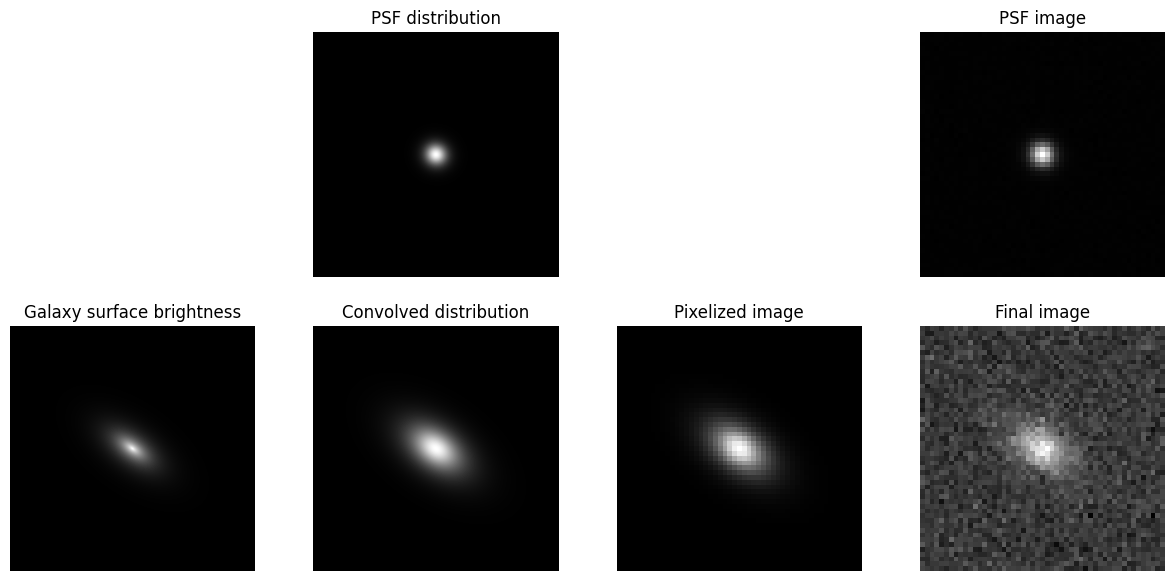

In [75]:
figure(figsize=(15,7))
subplot(245)
imshow(galaxy_image,cmap='gray');axis('off');title('Galaxy surface brightness')
subplot(242)
imshow(psf_image,cmap='gray');axis('off');title('PSF distribution')
subplot(246)
imshow(object_image,cmap='gray');axis('off');title('Convolved distribution')
subplot(247)
imshow(pixel_image,cmap='gray');axis('off');title('Pixelized image')
subplot(248)
imshow(final_image,cmap='gray');axis('off');title('Final image')
subplot(244)
imshow(psf_model,cmap='gray');axis('off');title('PSF image')
savefig('image_formation_paradigm.pdf',bbox_inches='tight')

## How do we measure ellipticities?

In [73]:
import ngmix

An ngmix.Observation is an object that contains an image, information about it's center, a weight for each of the pixels, and the transformation to sky coordinates. Let's build one!

In [80]:
#center information
img_cen = array(final_image.shape)/2
psf_cen = array(psf_model.shape)/2

#transformation to sky coordinates

